In [1]:
import math
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt


from tqdm.notebook import tqdm

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# IMPORTANT NOTES:

To do: Check whether it is computationally faster to try rotations with fixed angle first (and changing bead) or if it is better to change bead AND angle, at each random rotation attempted

# 2D Version


In [2]:
"""This function generates a random walk that simulates the protein 
as a string of beads which are either polar or hydrophobic"""

"""n is the dimension of the squared lattice, length is the number of beads of the protein"""


def makeProtein(n, length):
    
    protein_coordinates=[[],[]]
    beads=[]
    
    x=np.random.randint(0,n-10)
    y=np.random.randint(0,n-10)
    
    protein_coordinates[0].append(x)     #easier to plot than "protein_coordinates.append([x,y])"
    protein_coordinates[1].append(y)
    beads.append(np.random.randint(0,2))
    
    count=0
    
    while count <= length: 
        
        
        x_increase=np.random.randint(0,2)
        y_increase=np.random.randint(0,2)
        
        
        
        if x_increase!=y_increase:
            
            x=x + x_increase
            y=y + y_increase
            
            protein_coordinates[0].append(x)     
            protein_coordinates[1].append(y)
            beads.append(np.random.randint(0,2))
            
            count+=1
            
        else:
            
            pass
        
        
    return protein_coordinates, beads

In [3]:
"""This function performs a rigid rotation of one "leg" (segment) of the protein 
around a specific bead. It also prevents rotation that would cause an overlap
of different segments of the protein. Theta is the angle of rotation"""

def makeRandRotation(protein_coordinates,beads):
    counter=0
    while 1>0:
        
        theta=(np.pi/2)*np.random.randint(1,4)
        
        counter+=1
        starting=np.random.randint(1,len(beads)-1)
        
        """I am adding a random flip to allow rotation of segments on both sides of 'starting':   """
        flip=np.random.randint(0,101)
        if flip>70:
            protein_coordinates[0]=np.flip(protein_coordinates[0])
            protein_coordinates[1]=np.flip(protein_coordinates[1])
            
        else:
            pass

        rotating_x=protein_coordinates[0][starting:]
        rotating_y=protein_coordinates[1][starting:]
        
        rotating_leg=np.array([rotating_x,rotating_y])
    
        rotating_leg[0]=rotating_leg[0]-protein_coordinates[0][starting]
        rotating_leg[1]=rotating_leg[1]-protein_coordinates[1][starting]
        
        rotated_x= rotating_leg[0]*np.cos(theta) - rotating_leg[1]*np.sin(theta) + protein_coordinates[0][starting]
        rotated_y= rotating_leg[0]*np.sin(theta) + rotating_leg[1]*np.cos(theta) + protein_coordinates[1][starting]
        
        rotated_protein_x=np.concatenate([protein_coordinates[0][:starting],rotated_x])
        rotated_protein_y=np.concatenate([protein_coordinates[1][:starting],rotated_y])

        rotated_protein=np.array([rotated_protein_x,rotated_protein_y])

        '''To prevent rotations that may end up with overlapping segments of the protein: '''
        
        
        for x in range(len(rotated_protein[0])):
            neighbouring_points= np.where(np.sqrt((rotated_protein[0]-rotated_protein[0][x])**2 + (rotated_protein[1]-rotated_protein[1][x])**2)<1 )
  
            if len(neighbouring_points[0])>1:
                
                break
                
            elif x==len(rotated_protein[0])-1:
               
                return rotated_protein, beads
        if counter>1000:
            print("loop")
  


In [4]:
"""This function is only for plotting purposes: """


def makeColours(beads):
    
    colours=[]

    for colour in beads: 
        if colour==0:
            colours.append('red')
        else:
            colours.append('green')

    return colours

In [5]:
def plotProtein(x,y,colours,n,l):
    
    plt.grid(axis="both")
    plt.scatter(x,y,color=colours)
    plt.plot(x,y)
    plt.xlim(min(x)-l/3,min(x)+l)
    plt.ylim(min(y)-l/3,min(y)+l)
    plt.show()
    


In [6]:
def plotProteinZoom(x,y,colours,n,l):
    
    plt.grid(axis="both")
    plt.scatter(x,y,color=colours)
    plt.plot(x,y)
    plt.xlim(min(x)-5,max(x)+5)
    plt.ylim(min(y)-5,max(y)+5)
    plt.show()

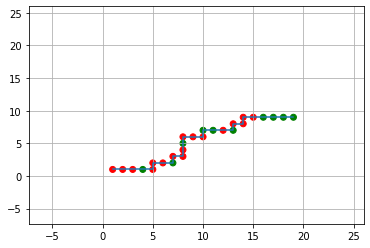

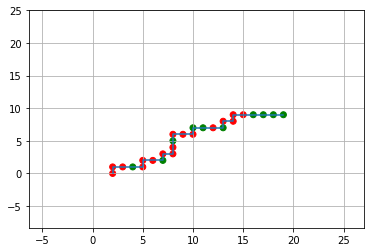

In [7]:
"""
    This tab can be used to visualise a randomly generated protein and its shape 
    after ONE rigid rotation    
    
    makeProtein(n, length) it takes two arguments, the size of the square lattice and the lenght of the protein.

"""
n=20
l=25
protein=makeProtein(n,l)

rotated_protein, beads=makeRandRotation(protein[0],protein[1])
colours_1= makeColours(protein[1])
colours_2= makeColours(beads)
plotProtein(protein[0][0],protein[0][1],colours_1,n,l)
plotProtein(rotated_protein[0],rotated_protein[1],colours_2,n,l)



In [8]:
def evaluateEnergy(rotated_protein, beads):
    
    total_energy=0 
    
    for aminoacid in range(len(beads)):
        
        
        if beads[aminoacid]==0:
            
            
            '''This is the previous version of the function: '''
            neighbouring_points= np.where(np.sqrt((rotated_protein[0]-rotated_protein[0][aminoacid])**2 + (rotated_protein[1]-rotated_protein[1][aminoacid])**2)<1.01 )
            
            '''It calculates energy also counting red aminoacids which are bonded by peptide bonds.
            The new version excludes those aminoacids.'''
            
            
            
            
            #print("I am checking aminoacids around the aminoacid number {} which is {} (0 means H, 1 means P)".format(aminoacid,beads[aminoacid]))
            #print("the neighbouring points are: {}".format(neighbouring_points))
            
            
            for neighbour in neighbouring_points[0]:
                if neighbour==aminoacid:
                    pass
                
                else: 
                    if (np.absolute(neighbour - aminoacid )!= 1 and beads[neighbour]==0): 
                        #print("of which, {} is not a peptide bond and it is {} (0 means H, 1 means P)".format(neighbour,beads[neighbour]))
                        #print("therefore energy decreases by 1")
                        total_energy += protein[1][neighbour] -1
                    else: 
                        pass
        else: 
            pass
    return total_energy

evaluateEnergy(rotated_protein, beads)  

0

In [9]:
"""Initial configuration and first rotation  !!  length protein is l+2 !!   """

n=70
l=48
protein=makeProtein(n,l)

interaction= makeColours(protein[1])


total_energy_in=evaluateEnergy(np.array(protein[0]), protein[1])
print("Initial energy is: {}".format(total_energy_in))
rotated_protein, beads=makeRandRotation(protein[0],protein[1])
total_energy=evaluateEnergy(rotated_protein, beads)
print("Energy after the first rigid rotation is: {}".format(total_energy))

"""Cell is separated from the next one to allow a different number of iterations on the same protein"""

Initial energy is: 0
Energy after the first rigid rotation is: -6


'Cell is separated from the next one to allow a different number of iterations on the same protein'

In [10]:
"""Changing 'beads' in this cell should allow 'custom' proteins """

#beads=[0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0]

"Changing 'beads' in this cell should allow 'custom' proteins "

The initial configuration is: 


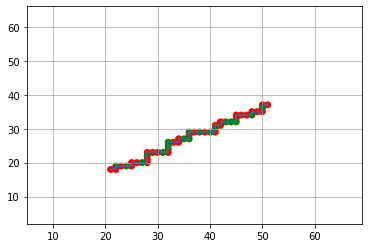

Initial energy is: 0



The deepest minimum is: 


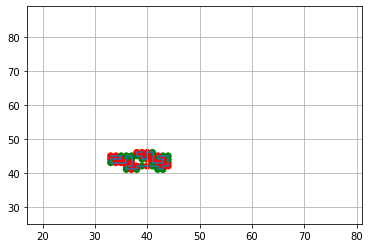

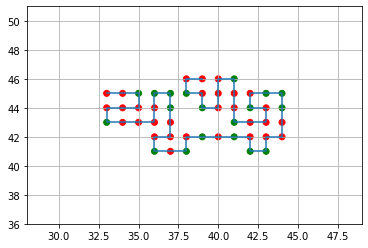

Energy from dictionary is:-38 
number of iterations:10001


In [11]:
m=1

print("The initial configuration is: ")
plotProtein(protein[0][0],protein[0][1],interaction,n,l)
print("Initial energy is: {}".format(total_energy_in))



minima={}
minima_beads={}
minima[total_energy]=rotated_protein
minima_beads[total_energy]=beads

iterations=10000
while m<iterations: 
    for i in tqdm(range(iterations)):    
        m+=1

        rotated_protein_new, beads_new=makeRandRotation(rotated_protein,beads)
        total_energy_new=evaluateEnergy(rotated_protein_new,  beads_new)

        W=np.exp(-(total_energy_new-total_energy))
        R=np.random.randint(0,1000)/1000

        if total_energy_new-total_energy <0 :
            rotated_protein=rotated_protein_new
            total_energy=total_energy_new
            
            minima[total_energy]=rotated_protein
            minima_beads[total_energy]=beads_new
            
        elif R<W:
            rotated_protein=rotated_protein_new
            
        else:
            pass
        

print("The deepest minimum is: ")
folded_protein =minima[min(minima)]
interaction= makeColours(minima_beads[min(minima)])
plotProtein(folded_protein[0],folded_protein[1],interaction,n,l)
plotProteinZoom(folded_protein[0],folded_protein[1],interaction,n,l)
print("Energy from dictionary is:{} ".format(min(minima)))
print("number of iterations:{}".format(m))      



In [12]:

evaluateEnergy(folded_protein,  beads_new)

-38

-6


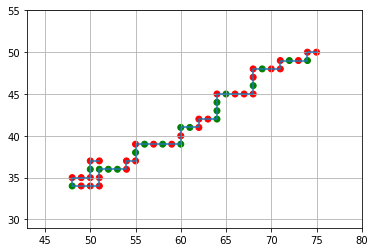

-8


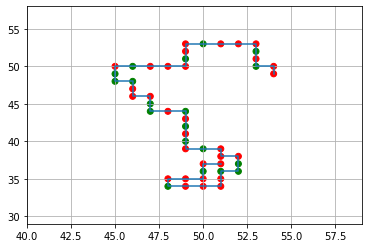

-12


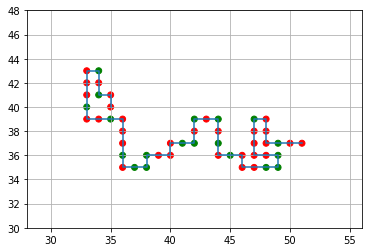

-14


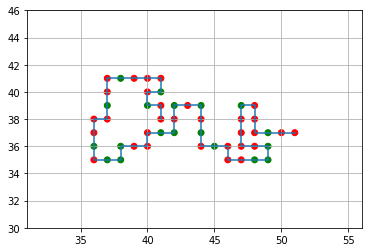

-16


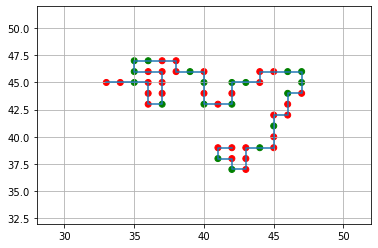

-18


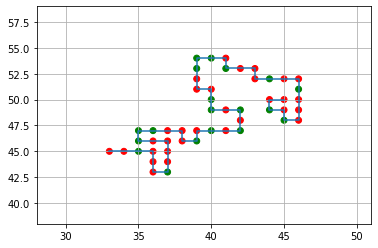

-20


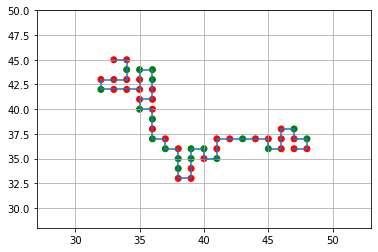

-24


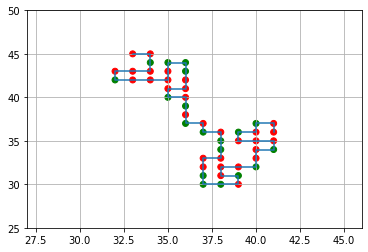

-26


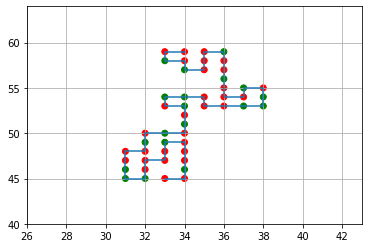

-28


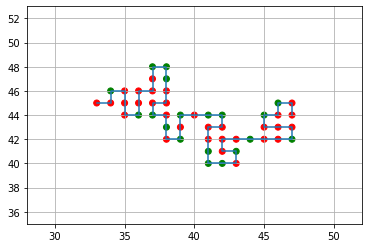

-30


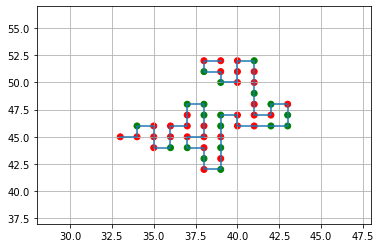

-32


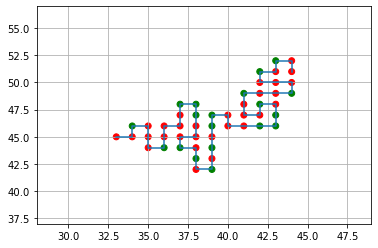

-34


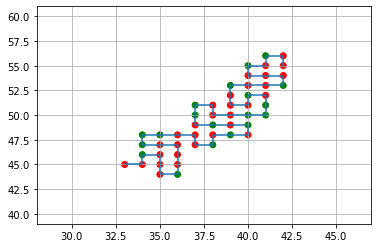

-36


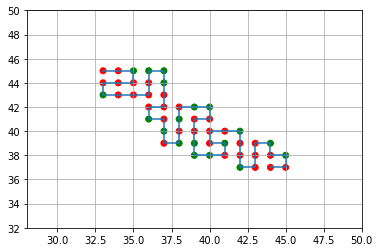

-38


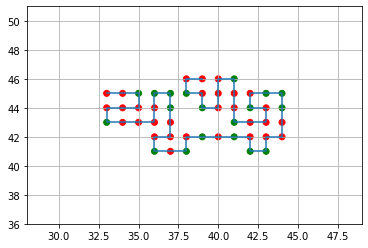

In [13]:

for minimum in minima:
    folded_protein =minima[minimum]
    beads_new= minima_beads[minimum]
    interaction= makeColours(beads_new)
    print(minimum)
    plotProteinZoom(folded_protein[0],folded_protein[1],interaction,n,l)
    
    

# 3D VERSION:

In [14]:
"""This function generates a random walk that simulates the protein 
as a string of beads which are either polar or hydrophobic"""

"""n is the dimension of the squared lattice, length is the number of beads of the protein"""


def makeProtein3D(n, length):
    
    protein_coordinates=[[],[],[]]
    beads=[]
    
    x=np.random.randint(0,n)
    y=np.random.randint(0,n)
    z=np.random.randint(0,n)
    
    
    protein_coordinates[0].append(x)     #easier to plot than "protein_coordinates.append([x,y])"
    protein_coordinates[1].append(y)
    protein_coordinates[2].append(z)
    beads.append(np.random.randint(0,2))
    
    count=0
    
    while count <= length: 

        
        x_increase=np.random.randint(0,2)
        y_increase=np.random.randint(0,2)
        z_increase=np.random.randint(0,2)
        
    
        if x_increase+y_increase+z_increase>1 or x_increase==y_increase==z_increase==0:
            
            pass
            
        else:
            #print(x_increase,y_increase,z_increase)
            
            x=x + x_increase
            y=y + y_increase
            z=z + z_increase
            
            protein_coordinates[0].append(x)     
            protein_coordinates[1].append(y)
            protein_coordinates[2].append(z)
            beads.append(np.random.randint(0,2))
            
            count+=1
        
        
    return protein_coordinates, beads

In [15]:
"""This function performs a rigid rotation of one "leg" (segment) of the protein 
around a specific bead. It also prevents rotation that would cause an overlap
of different segments of the protein. Theta is the angle of rotation"""

def makeRandRotation3D(protein_coordinates,beads):
    
    while 1>0:
        
        starting=np.random.randint(1,len(beads)-1)
        theta=(np.pi/2)*np.random.randint(1,4)
        phi=(np.pi/2)*np.random.randint(1,4)
        
        
        """I am adding a random flip to allow rotation of segments on both sides of 'starting':   """
        flip=np.random.randint(0,101)
        if flip>70:
            protein_coordinates[0]=np.flip(protein_coordinates[0])
            protein_coordinates[1]=np.flip(protein_coordinates[1])
            protein_coordinates[2]=np.flip(protein_coordinates[2])
           
        else:
            pass

        rotating_x=protein_coordinates[0][starting:]
        rotating_y=protein_coordinates[1][starting:]
        rotating_z=protein_coordinates[2][starting:]
        
        rotating_leg=np.array([rotating_x,rotating_y,rotating_z])
    
        rotating_leg[0]=rotating_leg[0]-protein_coordinates[0][starting]
        rotating_leg[1]=rotating_leg[1]-protein_coordinates[1][starting]
        rotating_leg[2]=rotating_leg[2]-protein_coordinates[2][starting]
        
        rotated_x= rotating_leg[0]*np.cos(phi) - rotating_leg[1]*np.sin(phi) + protein_coordinates[0][starting]
        rotated_y= rotating_leg[0]*np.cos(theta)*np.sin(phi) + rotating_leg[1]*np.cos(theta)*np.cos(phi)-rotating_leg[2]*np.sin(theta)  + protein_coordinates[1][starting]
        rotated_z= rotating_leg[0]*np.sin(theta)*np.sin(phi) + rotating_leg[1]*np.sin(theta)*np.cos(phi)+rotating_leg[2]*np.cos(theta)  + protein_coordinates[2][starting]
        
        rotated_protein_x=np.concatenate([protein_coordinates[0][:starting],rotated_x])
        rotated_protein_y=np.concatenate([protein_coordinates[1][:starting],rotated_y])
        rotated_protein_z=np.concatenate([protein_coordinates[2][:starting],rotated_z])
        
        rotated_protein=np.array([rotated_protein_x,rotated_protein_y,rotated_protein_z])

        '''To prevent rotations that may end up with overlapping segments of the protein: '''
        
        
        for x in range(len(rotated_protein[0])):
            neighbouring_points= np.where(np.sqrt((rotated_protein[0]-rotated_protein[0][x])**2 + (rotated_protein[1]-rotated_protein[1][x])**2 + (rotated_protein[2]-rotated_protein[2][x])**2)<1 )
  
            if len(neighbouring_points[0])>1:
                
                break
                
            elif x==len(rotated_protein[0])-1:
                #print("rotation around point number:{}, theta={} pi/2 around x and phi={} pi/2 around z".format(starting,theta/(np.pi/2),phi/(np.pi/2)))
                return rotated_protein, beads
  

In [16]:
"""This function is only for plotting purposes: """


def makeColours3D(beads):
    
    colours=[]

    for colour in beads: 
        if colour==0:
            colours.append('red')
        else:
            colours.append('green')

    return colours

In [17]:
def plotProtein3D(x,y,z,colours,n,l):
    
    fig = plt.figure() 
    ax = plt.axes(projection ='3d') 
    ax.scatter(x,y,z,color=colours)
    ax.plot(x,y,z,color="blue")
    ax.set_xlim(min(x)- l/2, min(x)+ l/2)
    ax.set_ylim(min(y)- l/2, min(y)+ l/2)
    ax.set_zlim(min(z)- l/2, min(z)+ l/2)    
    
    
    plt.show()
    

In [18]:
def plotProteinZoom3D(x,y,z,colours,n,l):


    fig = plt.figure() 
    ax = plt.axes(projection ='3d') 
    ax.scatter(x,y,z,color=colours)
    ax.plot(x,y,z,color="blue")
    
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    ax.set_zlim(min(z), max(z))
    plt.show()

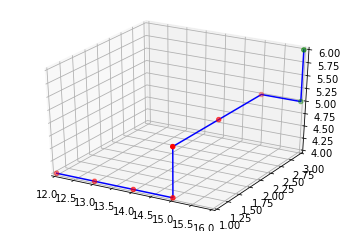

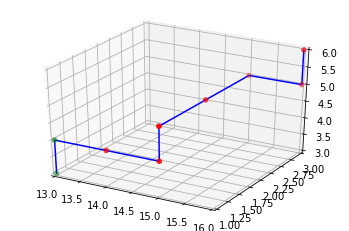

In [19]:
"""
    This tab can be used to visualise a randomly generated protein and its shape 
    after ONE rigid rotation    

"""

"""protein=makeProtein3D(n,length)"""
n=20
l=7
protein=makeProtein3D(n,l)
interaction=makeColours3D(protein[1])
plotProteinZoom3D(protein[0][0],protein[0][1],protein[0][2],interaction,n,l)
rotated_protein=makeRandRotation3D(protein[0],protein[1])
plotProteinZoom3D(rotated_protein[0][0],rotated_protein[0][1],rotated_protein[0][2],interaction,n,l)


In [20]:
def evaluateEnergy3D(rotated_protein, beads):
    
    total_energy=0 
    
    for aminoacid in range(len(beads)):
        
        if beads[aminoacid]==0:
            
            
            neighbouring_points= np.where(np.sqrt((rotated_protein[0]-rotated_protein[0][aminoacid])**2 + (rotated_protein[1]-rotated_protein[1][aminoacid])**2 + (rotated_protein[2]-rotated_protein[2][aminoacid])**2)<1.01 )
            
            
            
            for neighbour in neighbouring_points[0]:
                if neighbour==aminoacid:
                    pass 
                else:
                    if (np.absolute(neighbour - aminoacid )!= 1 and beads[neighbour]==0) : 
                        #
                        total_energy += protein[1][neighbour] -1
                    else: 
                        #print("peptide bond")
                        pass
                    
        else: 
            pass
    return total_energy

evaluateEnergy3D(rotated_protein[0], rotated_protein[1])




0

In [86]:
"""Initial configuration and first rotation"""

n=40
l=30
protein=makeProtein3D(n,l)


'''The follwing is for plotting purposes only: '''
interaction=makeColours3D(protein[1])




total_energy_in=evaluateEnergy3D(np.array(protein[0]), protein[1])
print("Initial energy is: {}".format(total_energy_in))
rotated_protein, beads=makeRandRotation3D(protein[0],protein[1])
total_energy=evaluateEnergy3D(rotated_protein, protein[1])
print("Energy after the first rigid rotation is: {}".format(total_energy))

"""Cell is separated from the next one to allow a different number of iterations on the same protein"""

Initial energy is: 0
Energy after the first rigid rotation is: 0


'Cell is separated from the next one to allow a different number of iterations on the same protein'

In [87]:
"""Changing 'beads' in this cell should allow 'custom' proteins """

#beads=[0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0]

"Changing 'beads' in this cell should allow 'custom' proteins "

The initial configuration is: 


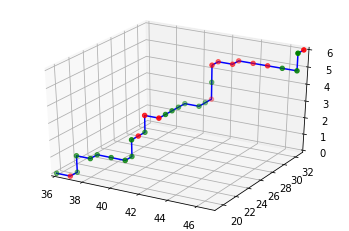

Initial energy is: 0



The deepest minimum is: 


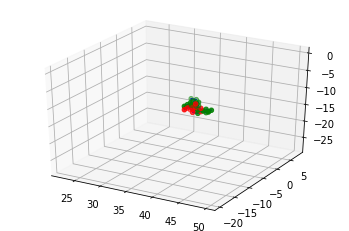

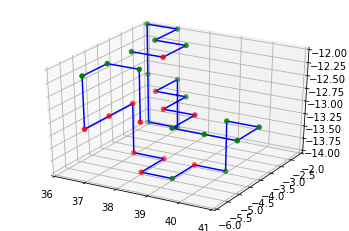

Energy is:-18 
number of iterations:10001


In [88]:
m=1

print("The initial configuration is: ")
plotProteinZoom3D(protein[0][0],protein[0][1],protein[0][2],interaction,n,l)
print("Initial energy is: {}".format(total_energy_in))



minima={}
minima_beads={}
minima[total_energy]=rotated_protein

iterations=10000
while m<iterations: 
    for i in tqdm(range(iterations)):    
        m+=1

        rotated_protein_new, beads=makeRandRotation3D(rotated_protein,protein[1])
        total_energy_new=evaluateEnergy3D(rotated_protein_new, beads)

        W=np.exp(-(total_energy_new-total_energy))
        R=np.random.randint(0,1000)/1000

        if total_energy_new-total_energy <0 :
            rotated_protein=rotated_protein_new
            total_energy=total_energy_new
            minima[total_energy]=rotated_protein
            minima_beads[total_energy]=beads
            
        elif R<W:
            rotated_protein=rotated_protein_new
            total_energy=total_energy_new
        else:
            pass
        

print("The deepest minimum is: ")
folded_protein=minima[min(minima)]
interaction=makeColours3D(minima_beads[min(minima)])

plotProtein3D(folded_protein[0],folded_protein[1],folded_protein[2],interaction,n,l)
plotProteinZoom3D(folded_protein[0],folded_protein[1],folded_protein[2],interaction,n,l)
print("Energy is:{} ".format(min(minima)))
print("number of iterations:{}".format(m))
            

In [89]:
sequence_x= pd.Series(protein[0][0])
sequence_y= pd.Series(protein[0][1])
sequence_z= pd.Series(protein[0][2])

df1= pd.DataFrame()

df1["x"]= sequence_x
df1["y"]= sequence_y
df1["z"]= sequence_z


sequence_x= pd.Series(folded_protein[0])
sequence_y= pd.Series(folded_protein[1])
sequence_z= pd.Series(folded_protein[2])

df= pd.DataFrame()

df["x"]= sequence_x
df["y"]= sequence_y
df["z"]= sequence_z

In [93]:
fig = px.scatter_3d(df1, x='x', y='y', z='z',color=interaction)
fig.show()

In [94]:
fig = px.scatter_3d(df, x='x', y='y', z='z',color=interaction)
fig.show()